# Exploratory Data Analysis (EDA)

- Outliers?
- Correlations?
- Consistency: do all values of the features and target make sense?
- Explore the data

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [3]:
df = pd.read_csv('data/hotel_booking_cleaning.csv')
df.shape

(119390, 32)

In [5]:
pd.options.display.max_columns = None   #para que muestren todas las columnas
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    0.0      0.0   
1                  C                4   No Deposit    0.0      0.0   
2                  C                0   No Deposit    0.0      0.0   
3                  A                0   No Deposit  304.0      0.0   
4                  A                0   No Deposit  240.0      0.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

## Numerical features distribution

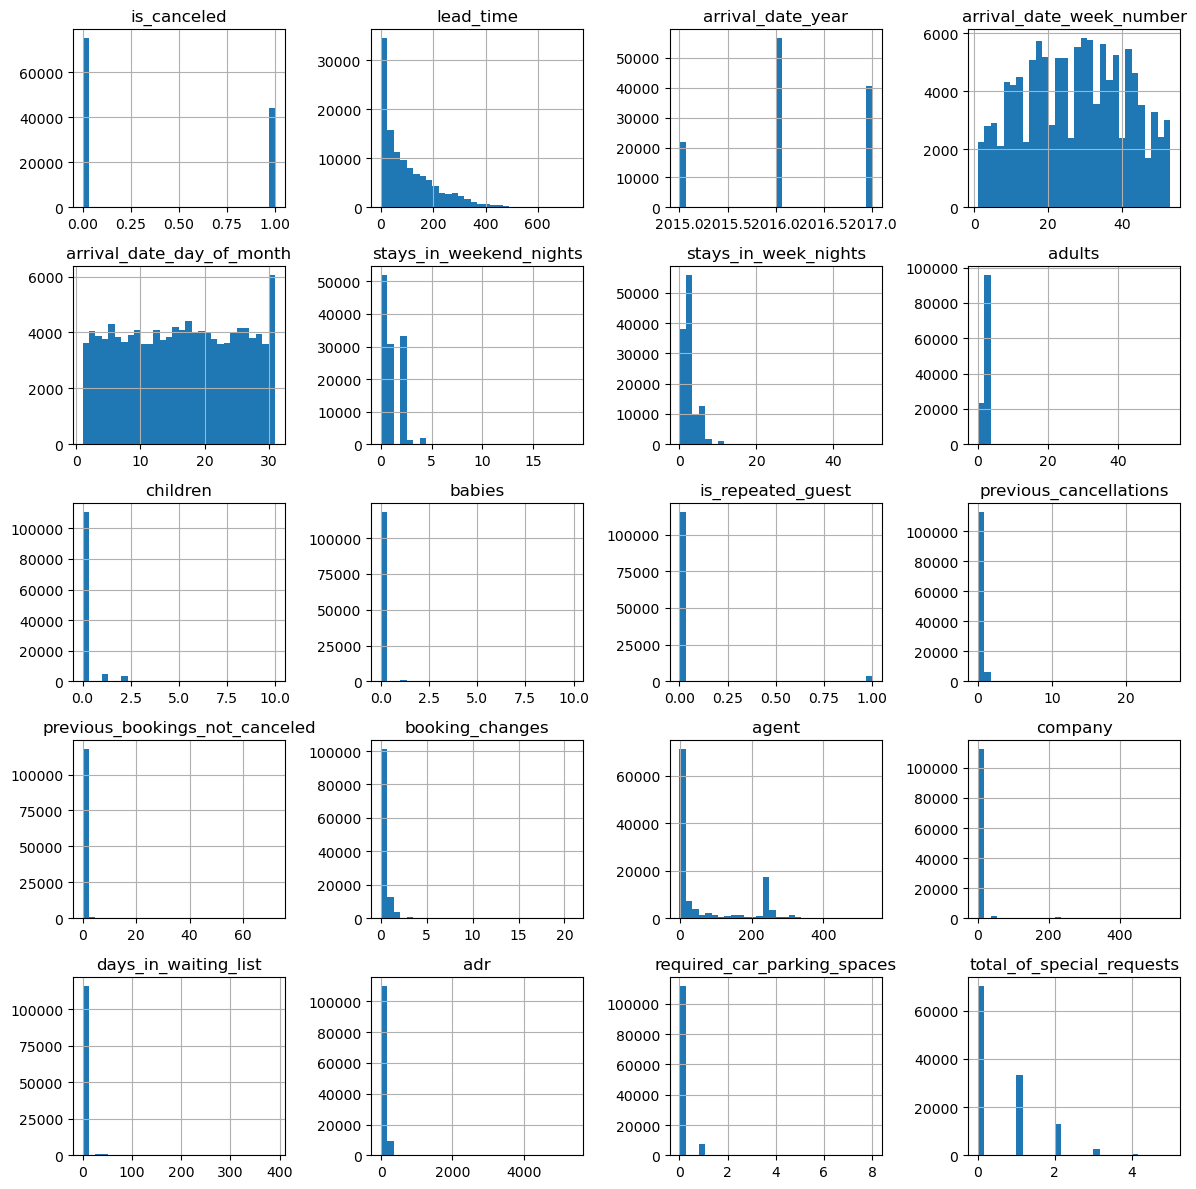

In [6]:
df.hist(bins=30, figsize=(12, 12))
plt.tight_layout()
plt.show()

Todos los valores parecen correctos

In [23]:
df["is_canceled"].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

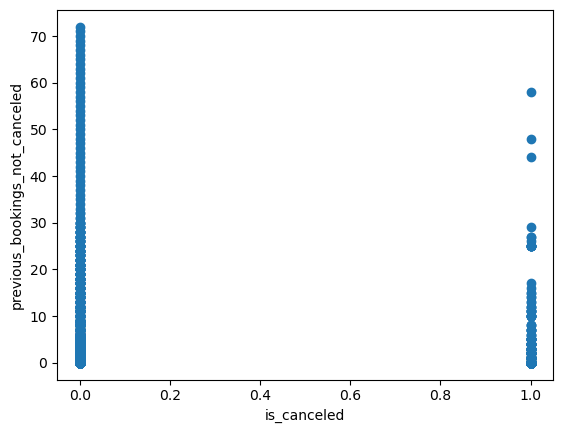

In [36]:
# Year built for houses that were remodeled in 1950
plt.scatter(df["is_canceled"], df["previous_bookings_not_canceled"])
# plt.plot(df[df["is_canceled"] == 1]["previous_bookings_not_canceled"])
plt.xlabel('is_canceled')
plt.ylabel('previous_bookings_not_canceled')
plt.show()

## Categorical features distribution

In [37]:
# Categorical features
df.columns[df.dtypes == 'object']

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

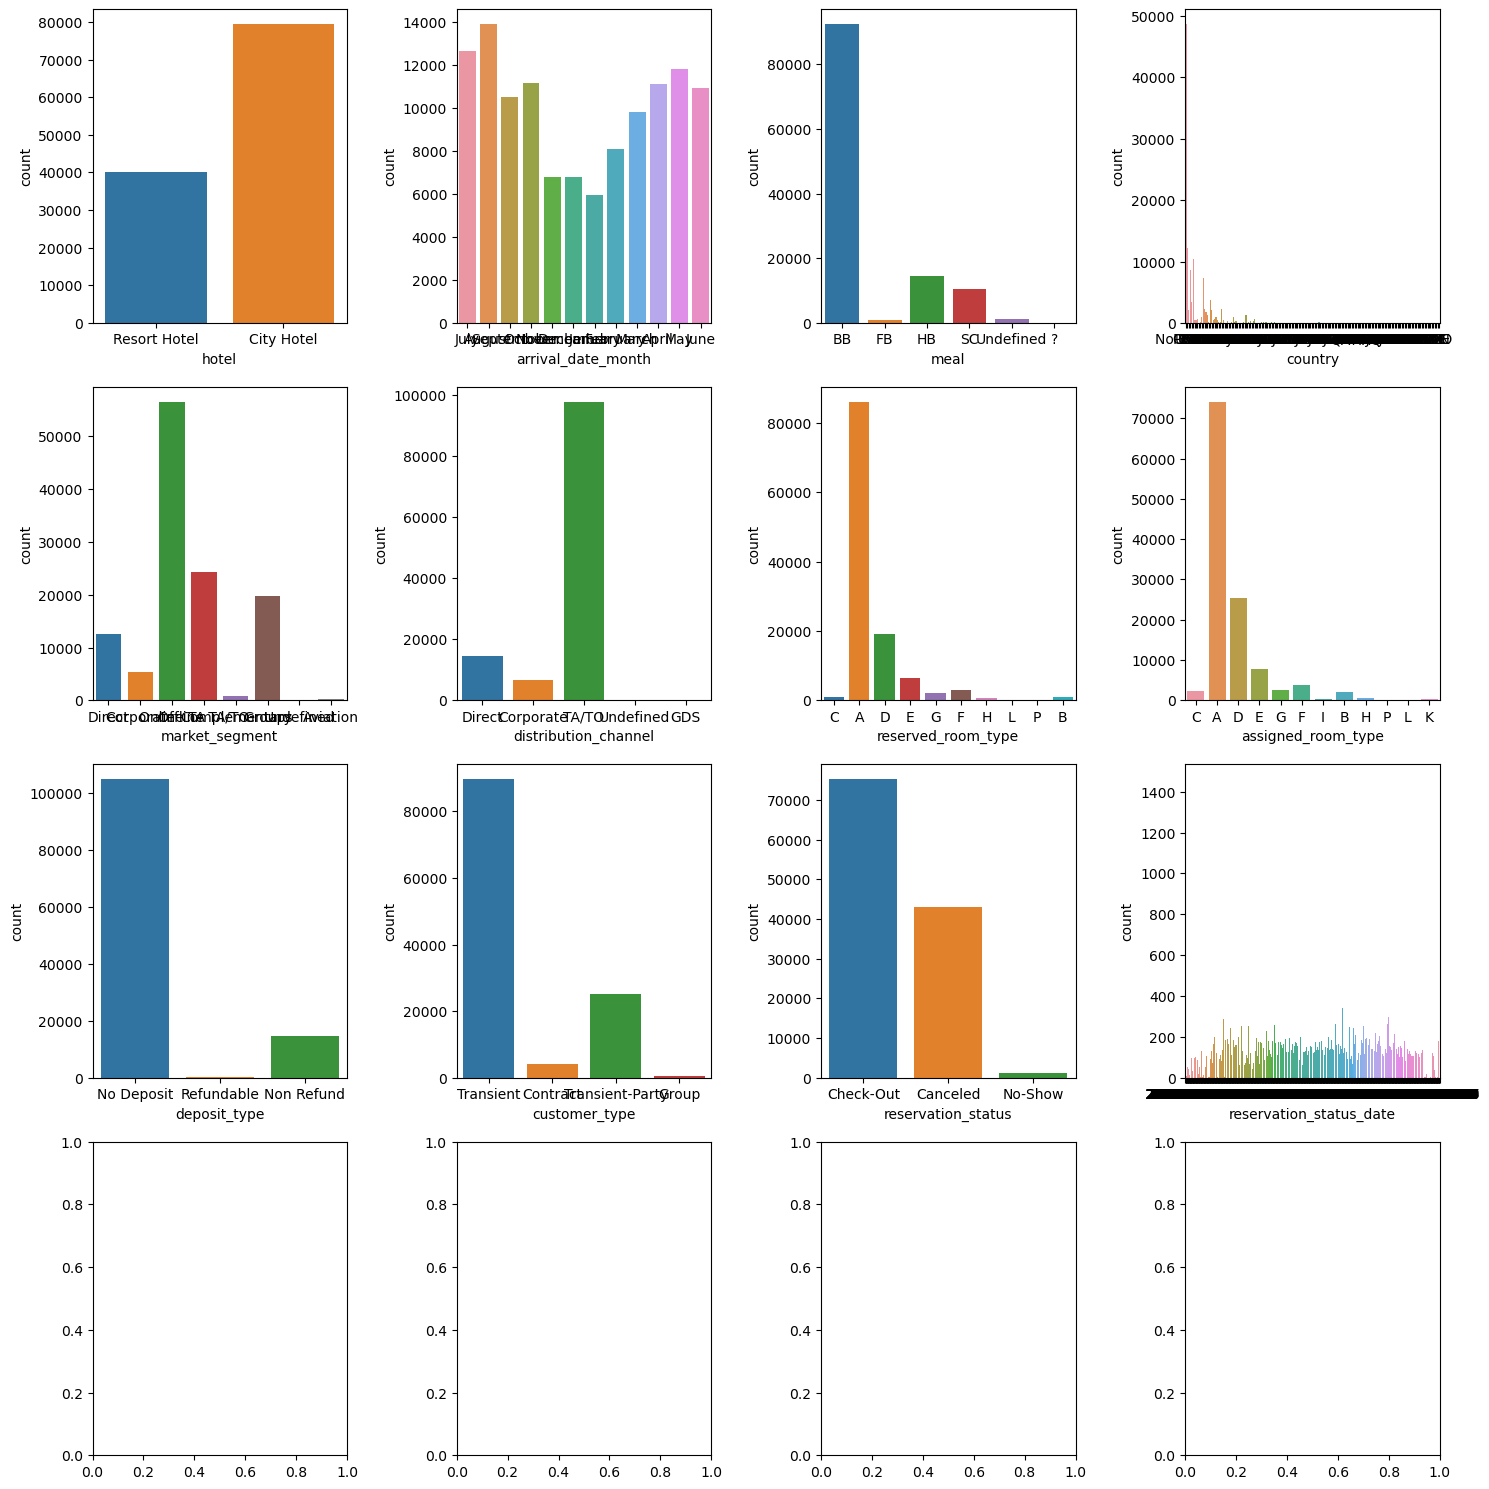

In [38]:
# 4 subplots in one row
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
obj_fts = df.columns[df.dtypes == 'object']

for i, col in enumerate(obj_fts):
    x, y = divmod(i, 4)
    sns.countplot(x=df[col], ax=axes[x, y])

plt.tight_layout()
plt.show()

## Correlation matrix

C:\Users\Alumne_mati1\AppData\Local\Temp\ipykernel_13284\3397144567.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, linecolor='white')


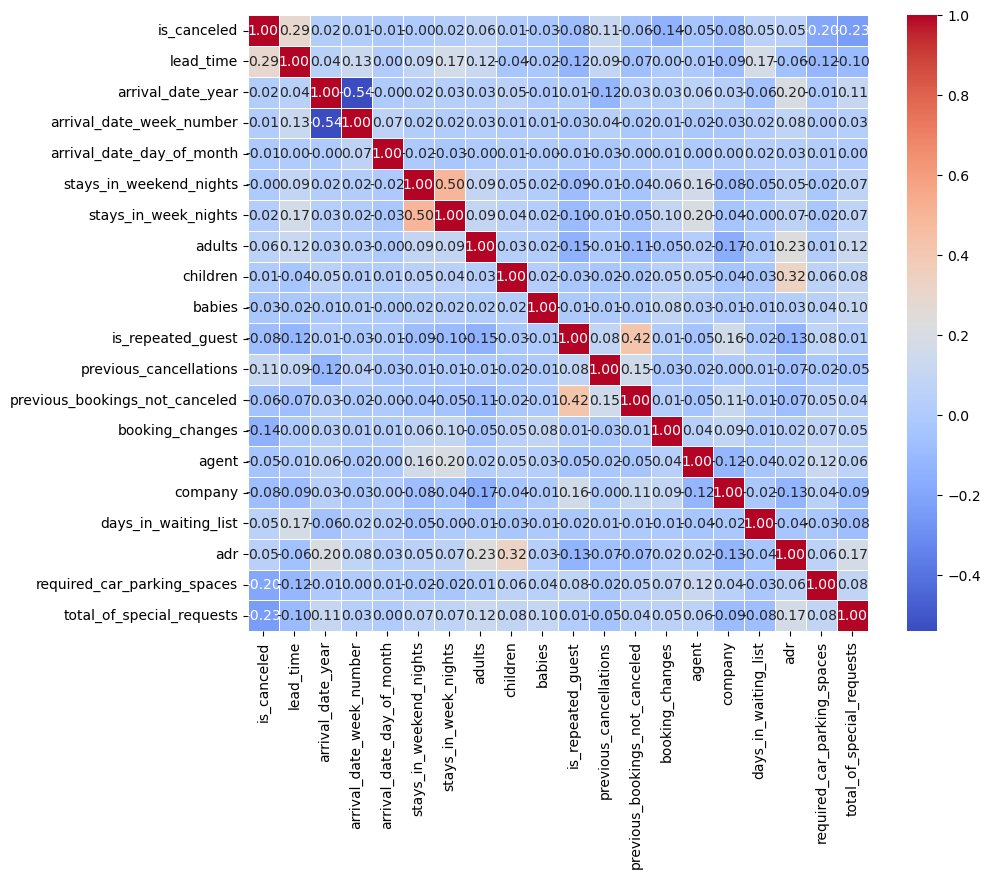

In [39]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, linecolor='white')

plt.show()

## Pair Plot

In [40]:
# Numerical features
df.select_dtypes(include='number').columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

### Scatter

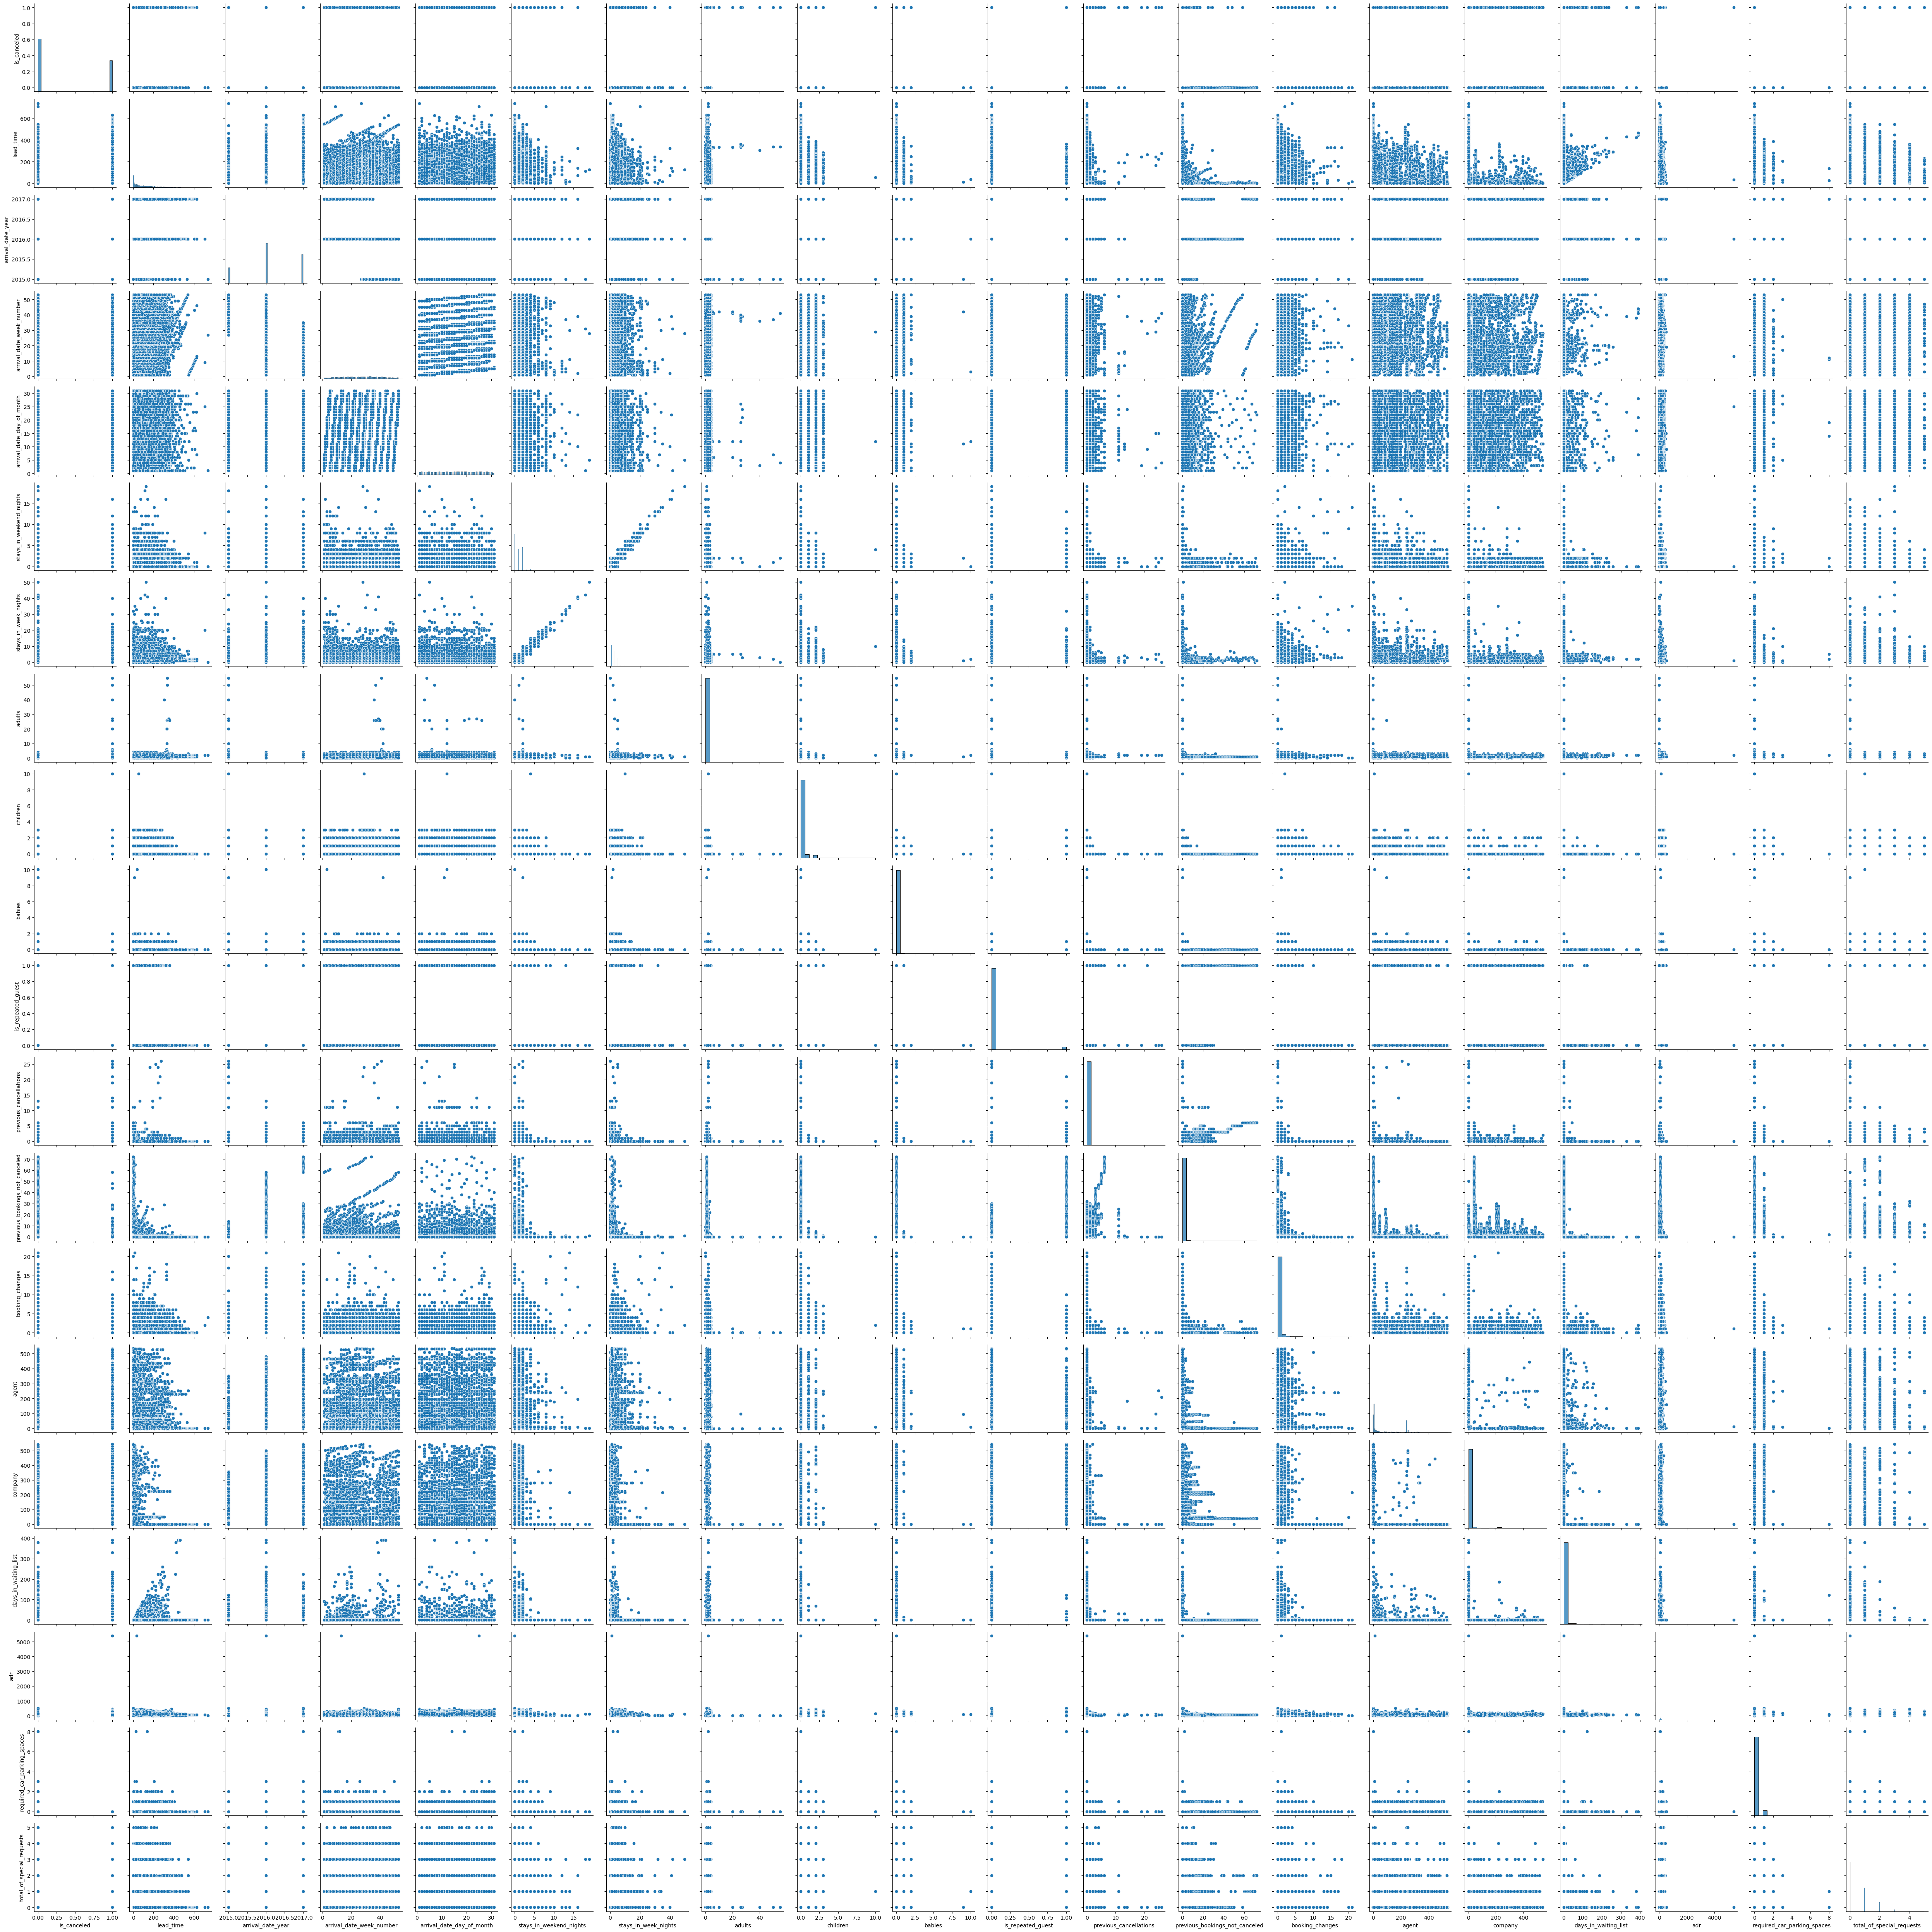

In [41]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

## Correlation

In [4]:
# feature correlations with sale is_canceled
is_cancel = df.corr(numeric_only=True)['is_canceled'].sort_values(ascending=False)[1:].to_frame()

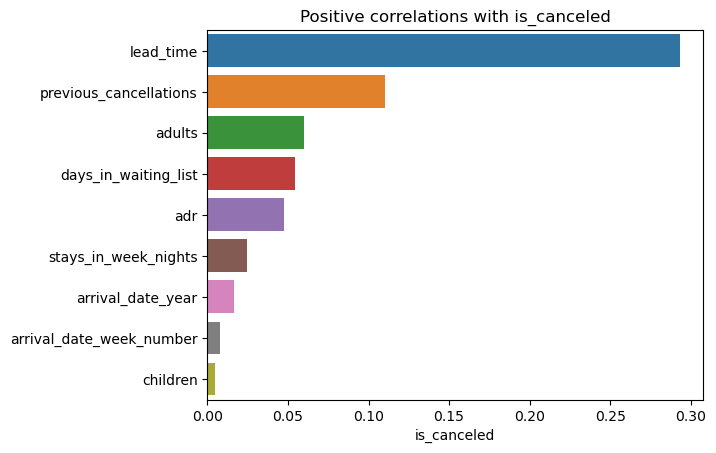

In [5]:
# positive correlations
pos_corrs = is_cancel[is_cancel['is_canceled'] >= 0]
sns.barplot(x='is_canceled', y=pos_corrs.index, data=pos_corrs)
plt.title('Positive correlations with is_canceled')
plt.show()

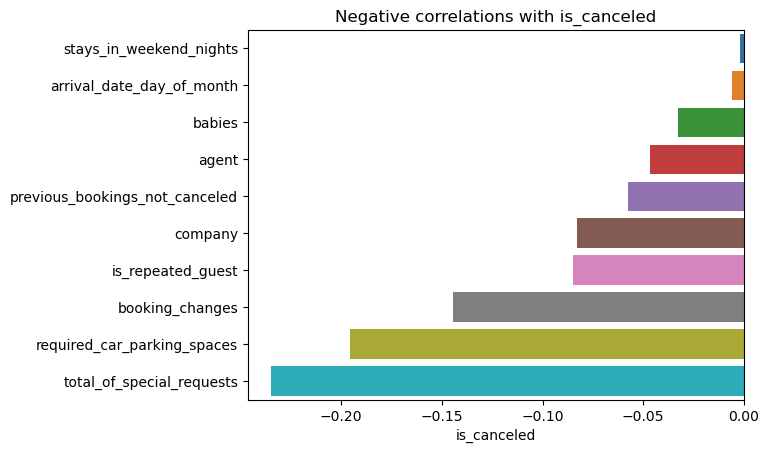

In [6]:
# negative correlations
neg_corrs = is_cancel[is_cancel['is_canceled'] < 0]
sns.barplot(x='is_canceled', y=neg_corrs.index, data=neg_corrs)
plt.title('Negative correlations with is_canceled')
plt.show()